# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

<b>Advatages of an area plot</b>:
- all information is on one graph, makes the two lines/areas easily comparable
- can visually interpret which compound contributes to more of the water sample, e.g. more nitrate means more area colored in that specifies nitrate and vice versa


<b>Disadvatages of an area plot</b>:
- hard to determine specific levels

    - the nitrate level line is much more interpretable. This is because the bottom is relative to 0%. However the same cannot be said of the phospate line. One would have to imagine shifting this line down by offsetting the nitrate line, in order to know precisley the concentration of phosphate at any given time frame
- you lose detail which could be found in the seperate line charts

<b>How would you adjust the graphs shown to improve the presentation?</b>

- I'm not too familiar with eutrophic value. (Tried researching it but ended up more confused) However I see a % sign on each of these axes. Depending on how eutrophic value works, we could normalize the two before combining them into the area chart such that the % does not add up to over 100%. Right now the y-axis goes to 160%. I'm not sure what that means.
- Additionally, we can add a title and y-label, as well as a legend which accurately conveys the two compound levels. Right now it simply says ser1 and ser2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_2716/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

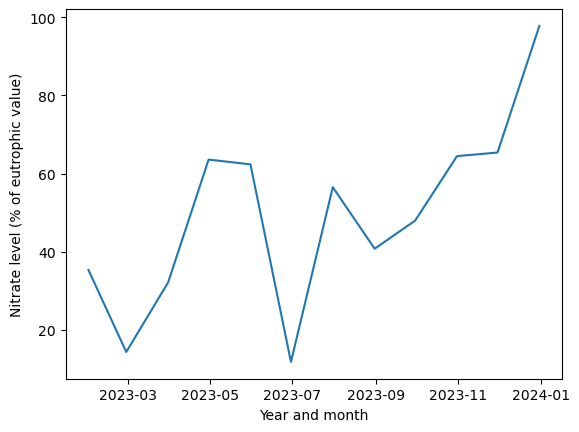

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_2716/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

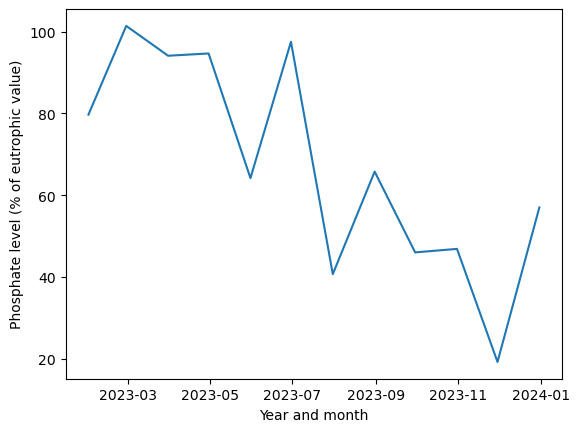

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

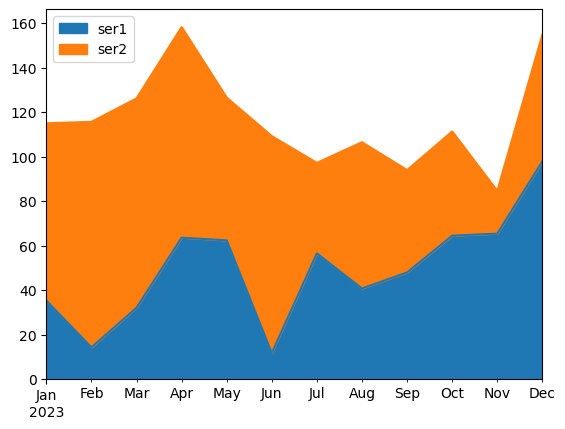

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [5]:
cyber_df = pd.read_csv('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/cyber_security_attacks/cybersecurity_attacks.csv')
beth_df = pd.read_csv('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/beth_dataset/labelled_training_data.csv')
UNSW_df = pd.read_parquet('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/UNSW-NB15 dataset/UNSW_NB15_training-set.parquet')

In [6]:
def plot_heatmap(df, df_name="DataFrame", figsize=(16, 10), annot=True, cmap='coolwarm', title=None):

    # Compute the correlation matrix for numeric columns only
    correlation_matrix = df.corr(numeric_only=True)
    
    # Set a default title if not provided
    if title is None:
        title = f'Correlation Matrix for {df_name}'
    
    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=annot, cmap=cmap)
    plt.title(title)
    plt.show()

In [7]:
def plot_scatter_high_corr_pairs(df, threshold=0.4, base_figsize=(8, 4)):

    # Compute the correlation matrix for numeric columns
    corr_matrix = df.corr(numeric_only=True)
    
    # List to store column pairs and their correlation value
    pairs = []
    
    # Loop over upper triangle of the correlation matrix (avoid duplicates and self-correlation)
    cols = corr_matrix.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                pairs.append((cols[i], cols[j], corr_value))
    
    n_pairs = len(pairs)
    
    if n_pairs == 0:
        print(f"No column pairs found with absolute correlation > {threshold}.")
        return
    
    # Create subplots: one row per pair
    fig, axes = plt.subplots(n_pairs, 1, figsize=(base_figsize[0], base_figsize[1] * n_pairs))
    
    # Ensure axes is iterable even if there's only one pair
    if n_pairs == 1:
        axes = [axes]
    
    for ax, (col1, col2, corr_val) in zip(axes, pairs):
        sns.scatterplot(x=col1, y=col2, data=df, ax=ax)
        ax.set_title(f'Scatter plot: {col1} vs {col2} (corr = {corr_val:.2f})')
    
    plt.tight_layout()
    plt.show()

In [8]:
def plot_numeric_columns_vs_timestamp(df: pd.DataFrame):

    # Determine the timestamp column name
    if 'timestamp' in df.columns:
        timestamp_col = 'timestamp'
    elif 'Timestamp' in df.columns:
        timestamp_col = 'Timestamp'
    
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Remove the timestamp column from numeric columns to avoid plotting it as y
    if timestamp_col in numeric_cols:
        numeric_cols.remove(timestamp_col)

    # Check if there are any numeric columns to plot
    if not numeric_cols:
        raise ValueError("There are no numeric columns to plot against the timestamp.")

    # Create a subplot for each numeric column
    num_plots = len(numeric_cols)
    fig, axes = plt.subplots(num_plots, 1, figsize=(12, 4 * num_plots), sharex=True)

    # If there is only one numeric column, wrap axes in a list to make the loop work
    if num_plots == 1:
        axes = [axes]

    # Plot each numeric column against the timestamp
    for ax, col in zip(axes, numeric_cols):
        sns.lineplot(x=df[timestamp_col], y=df[col], ax=ax)
        ax.set_title(f"{col} vs {timestamp_col}")
        ax.set_xlabel(timestamp_col)
        ax.set_ylabel(col)

    plt.tight_layout()
    plt.show()

In [9]:
def count_outliers_iqr(df: pd.DataFrame) -> dict:

    outlier_counts = {}
    # Get a list of numeric columns
    numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
    
    for col in numeric_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_counts[col] = outlier_count
        
    return outlier_counts

## Beth dataset

### Correlation plot

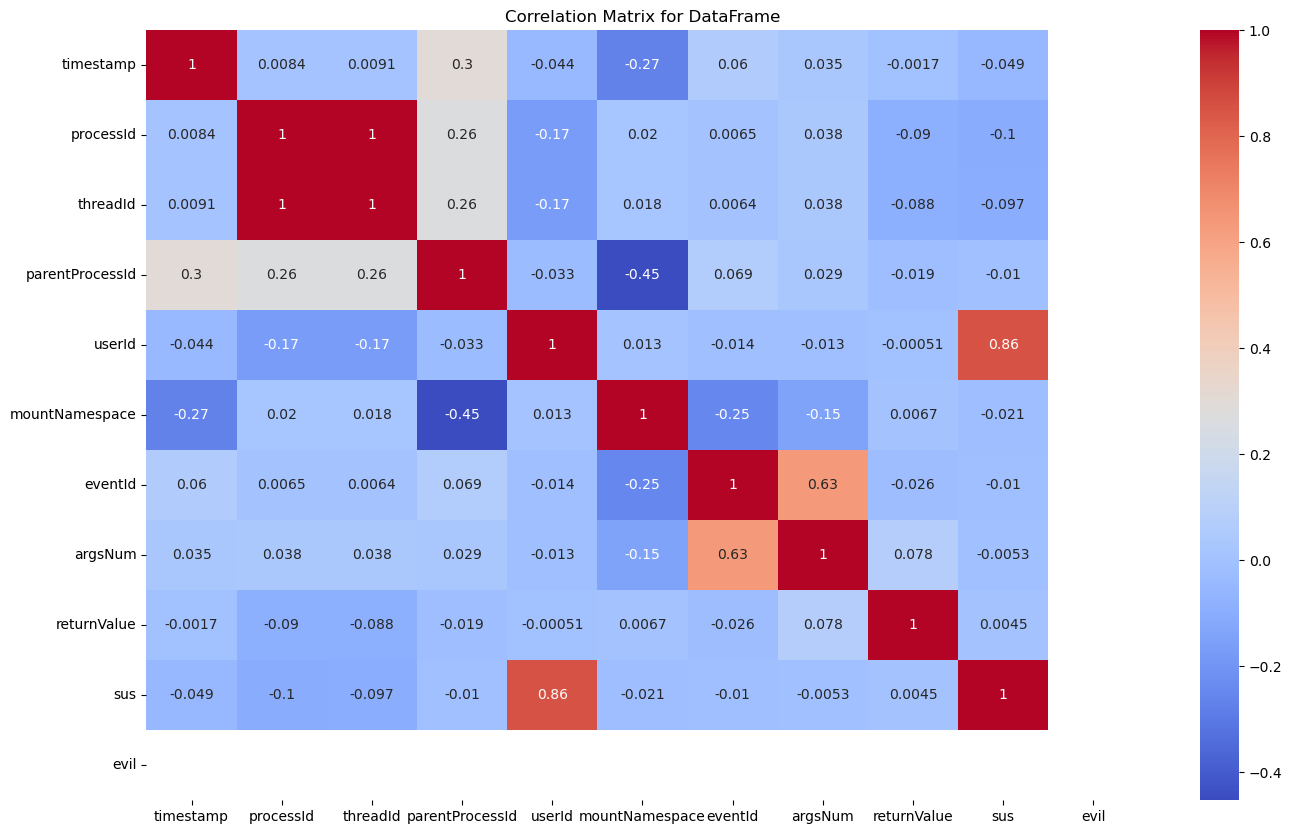

In [10]:
plot_heatmap(beth_df)

### Scatterplots

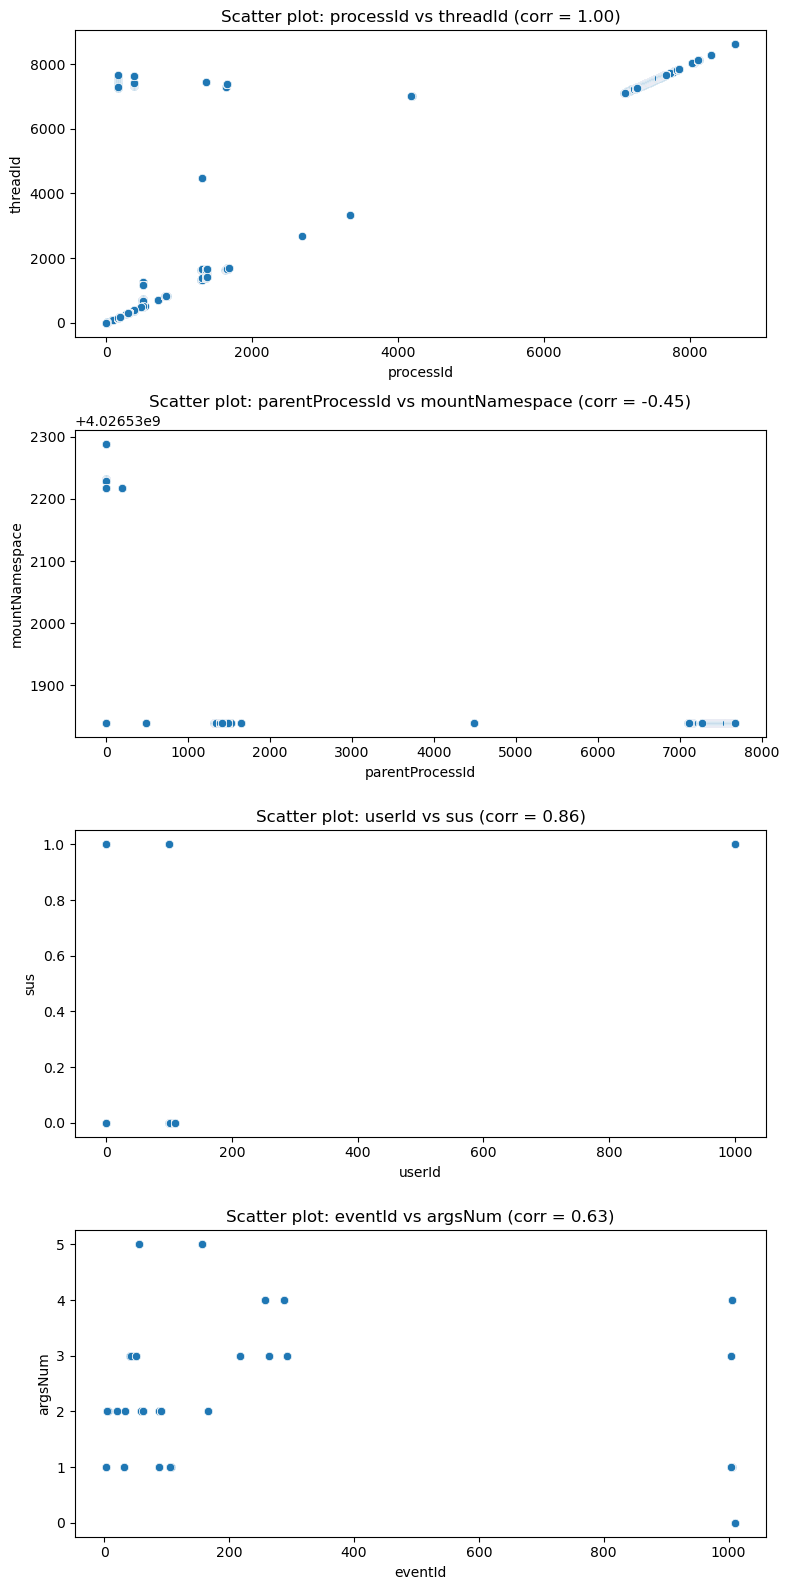

In [11]:
plot_scatter_high_corr_pairs(beth_df)

### Pairplot

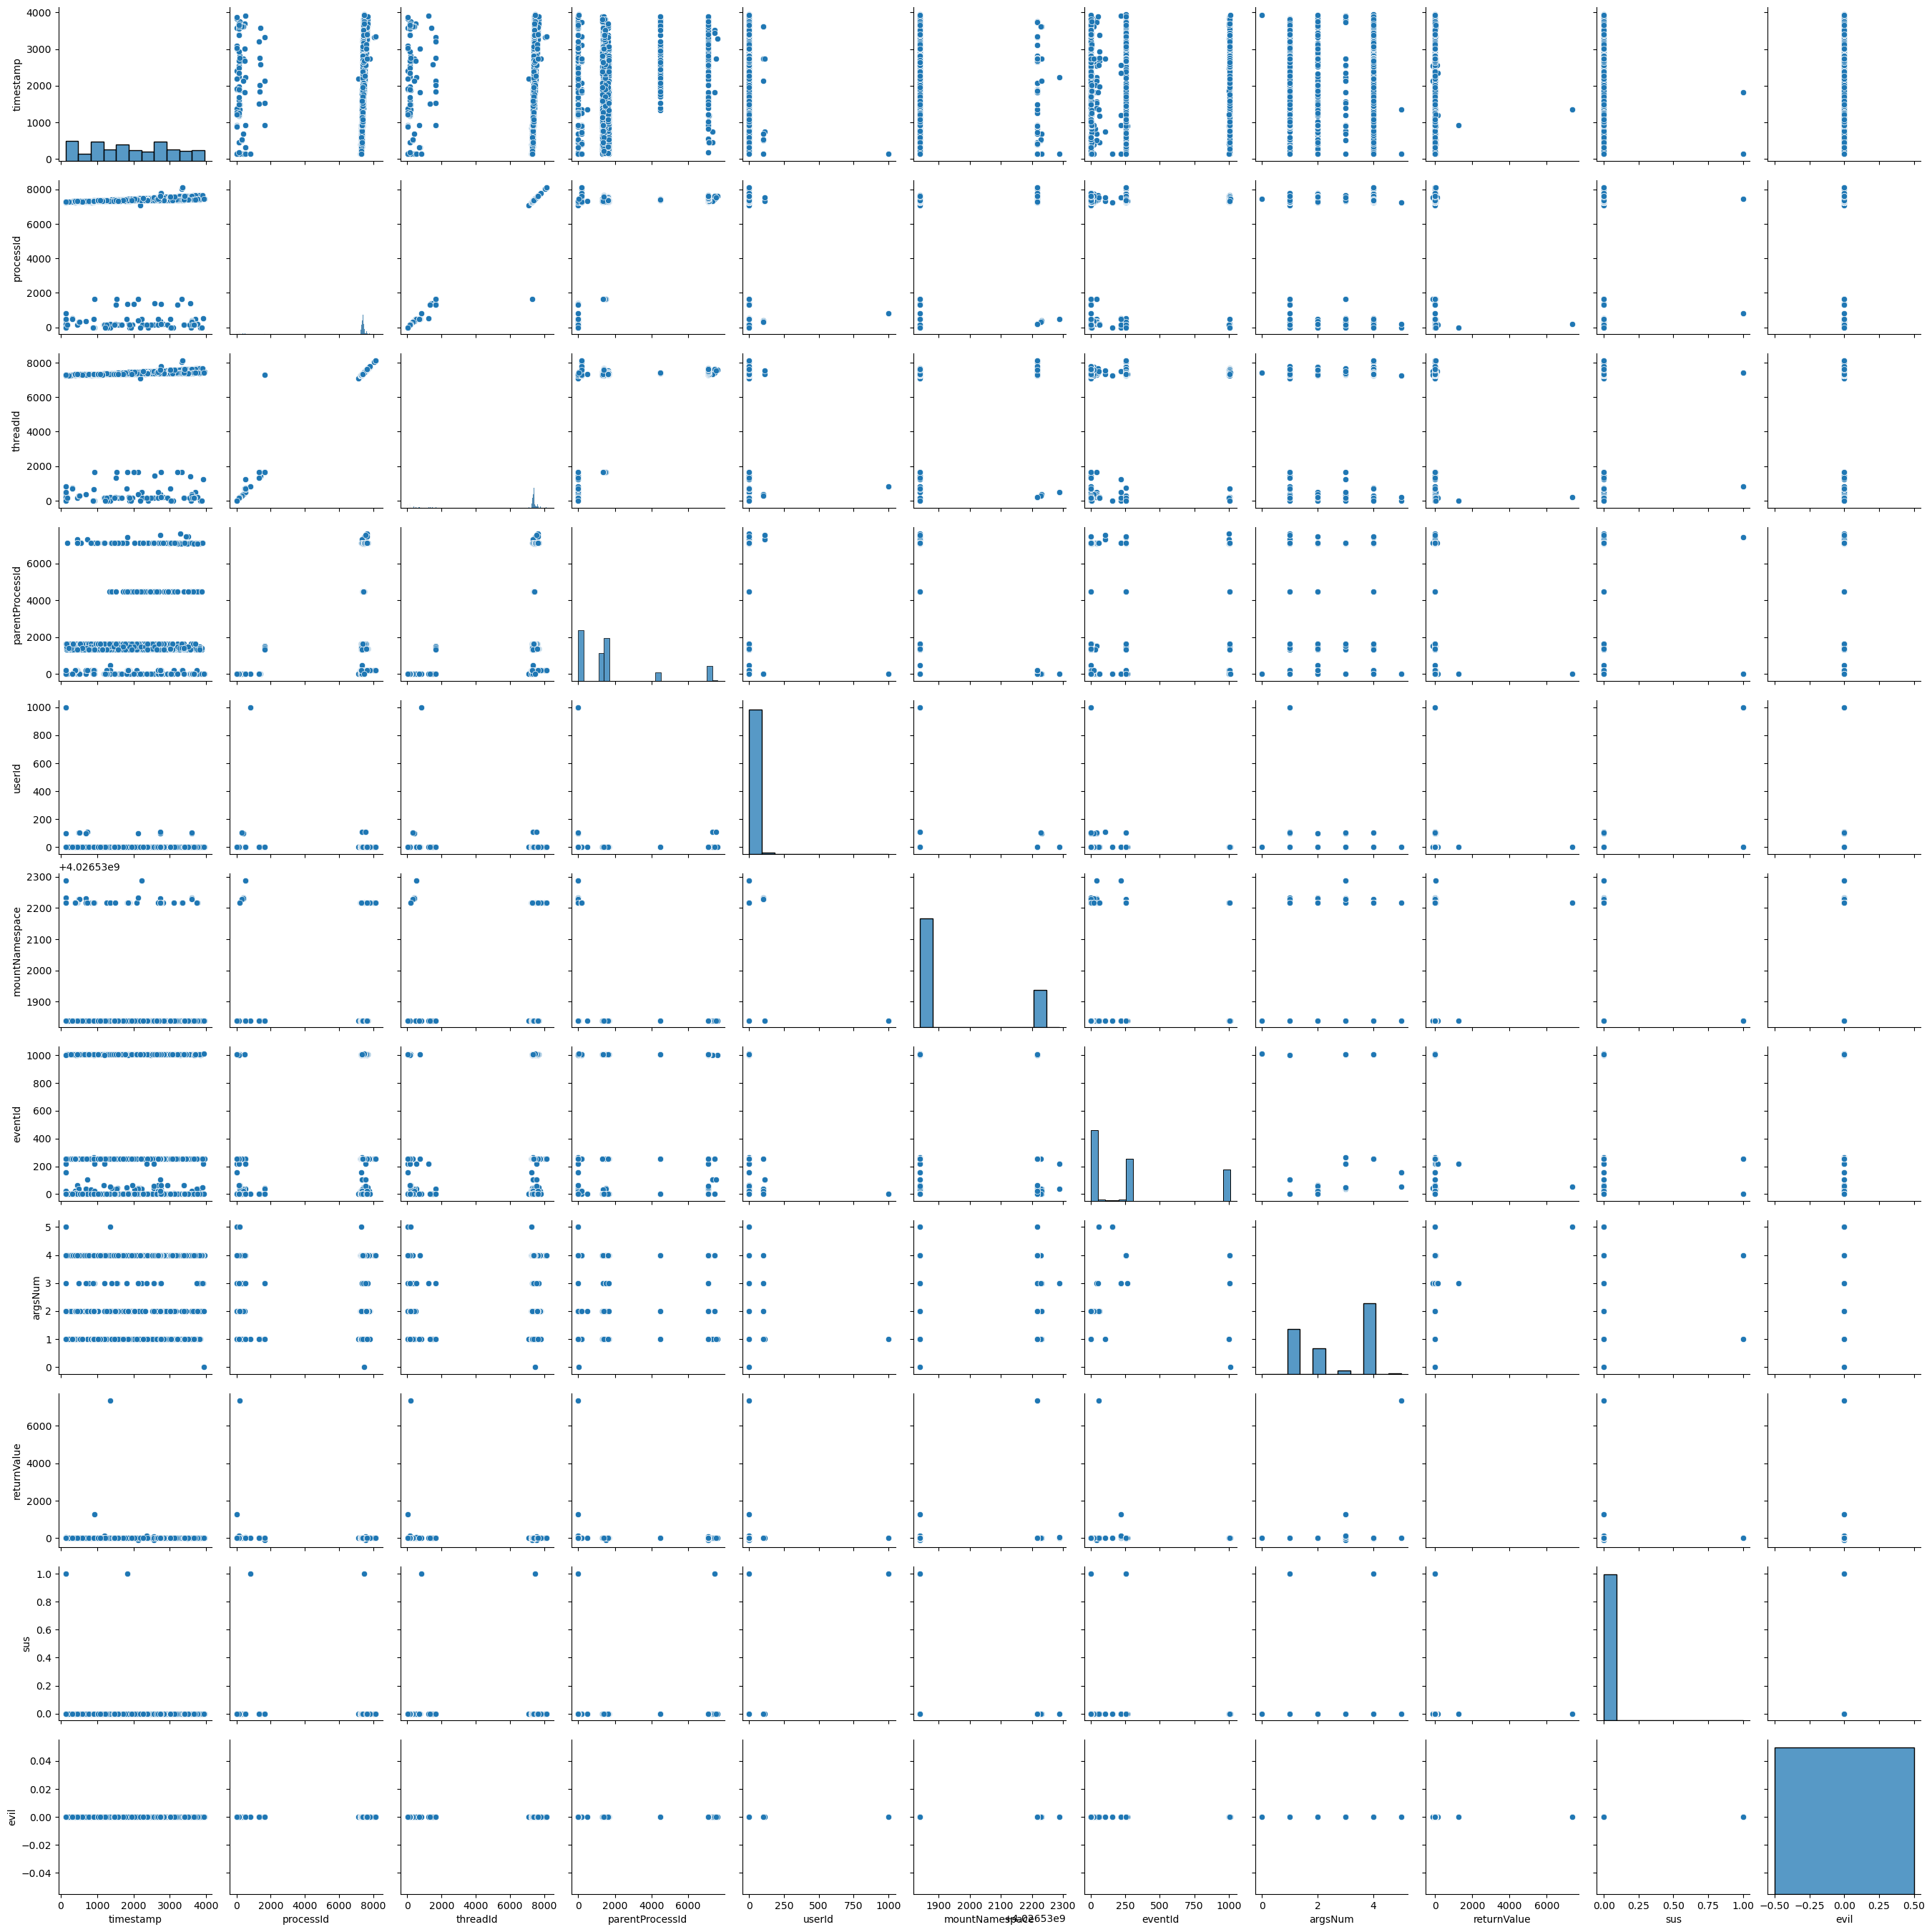

In [12]:
# random sample for pairplot
beth_sample = beth_df.sample(n=1000, random_state=42)
sns.pairplot(beth_sample)

### Outlier detection

In [13]:
count_outliers_iqr(beth_df)

{'timestamp': 0,
 'processId': 123191,
 'threadId': 122939,
 'parentProcessId': 138869,
 'userId': 8237,
 'mountNamespace': 0,
 'eventId': 160625,
 'argsNum': 0,
 'returnValue': 39065,
 'sus': 1269,
 'evil': 0}

### Line/Area plots

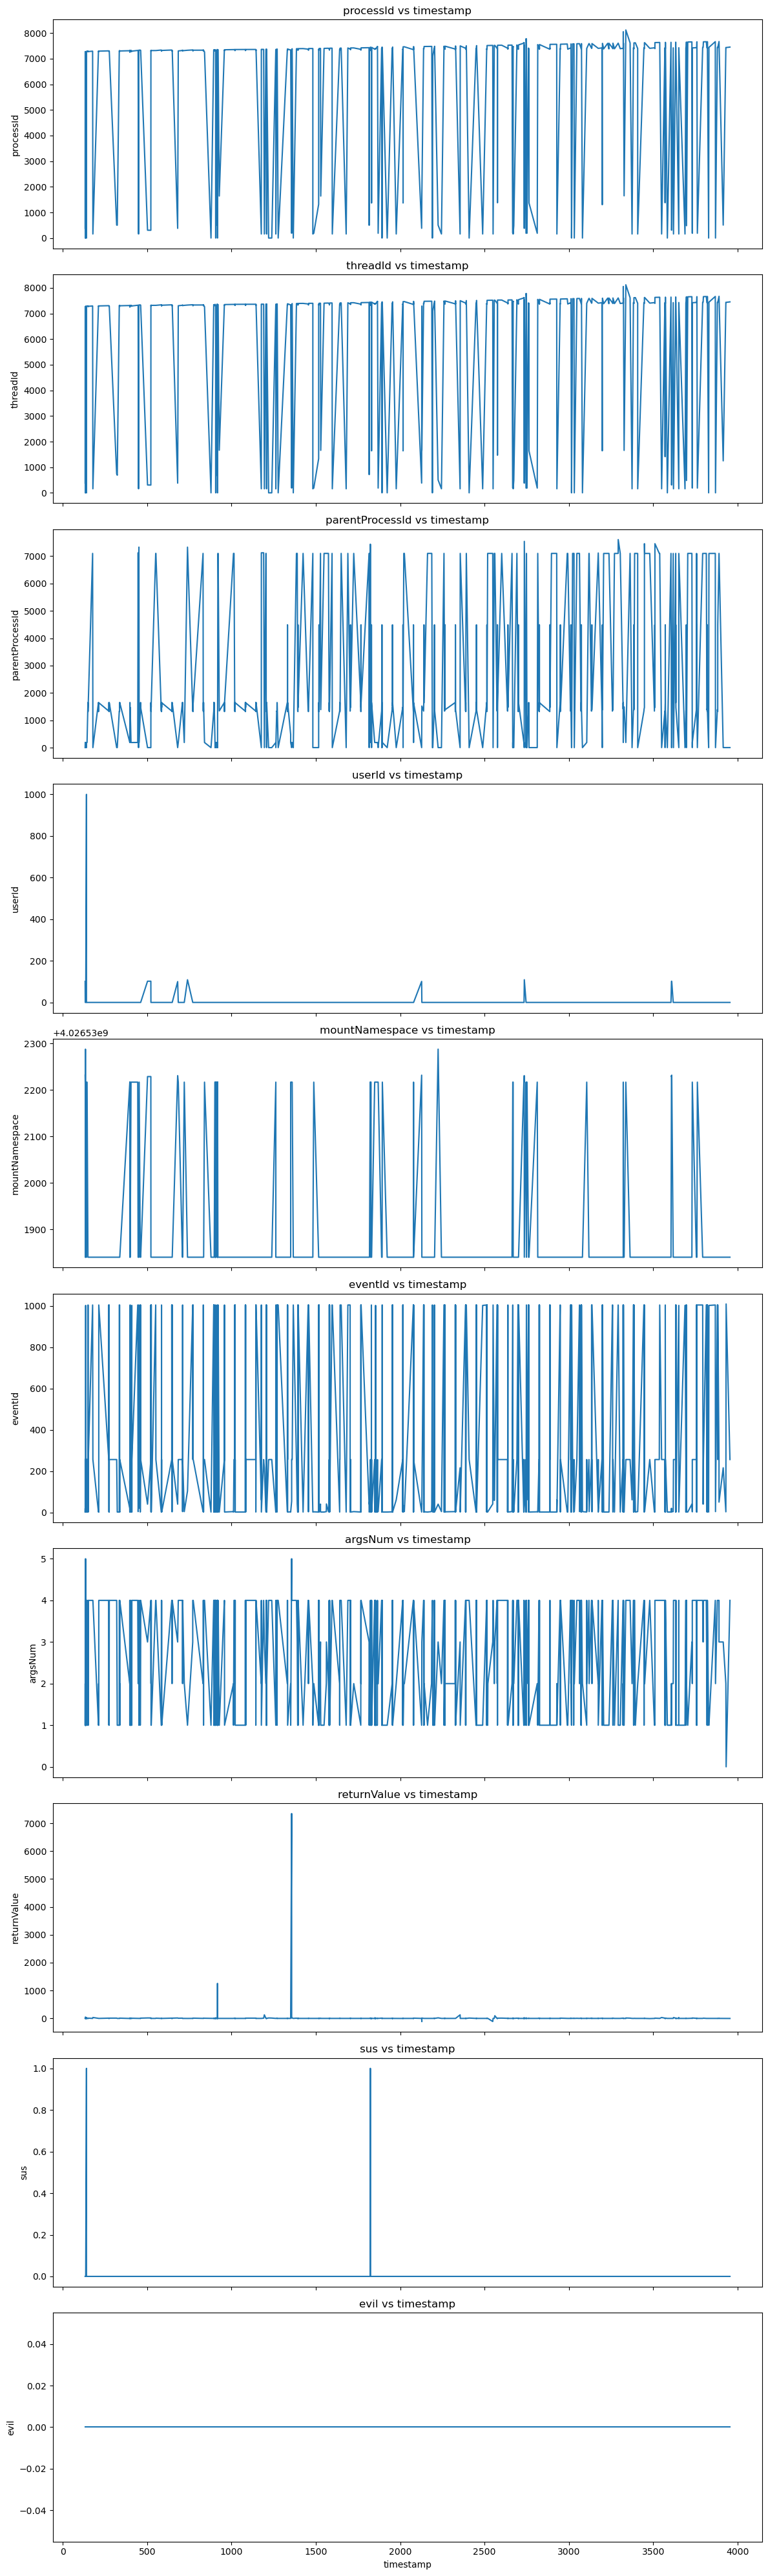

In [14]:
plot_numeric_columns_vs_timestamp(beth_sample)

---

## Cyber dataset

In [15]:
cyber_df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

### Correlation plot

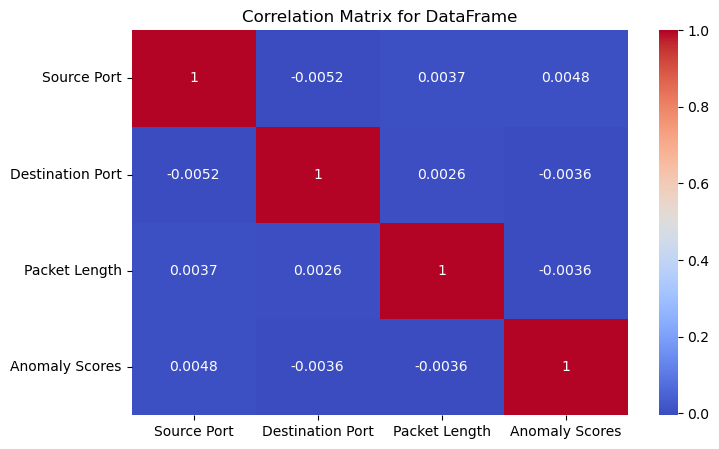

In [16]:
plot_heatmap(cyber_df, figsize=(8,5))

### Scatterplots

No high correlations here

### Pairplot

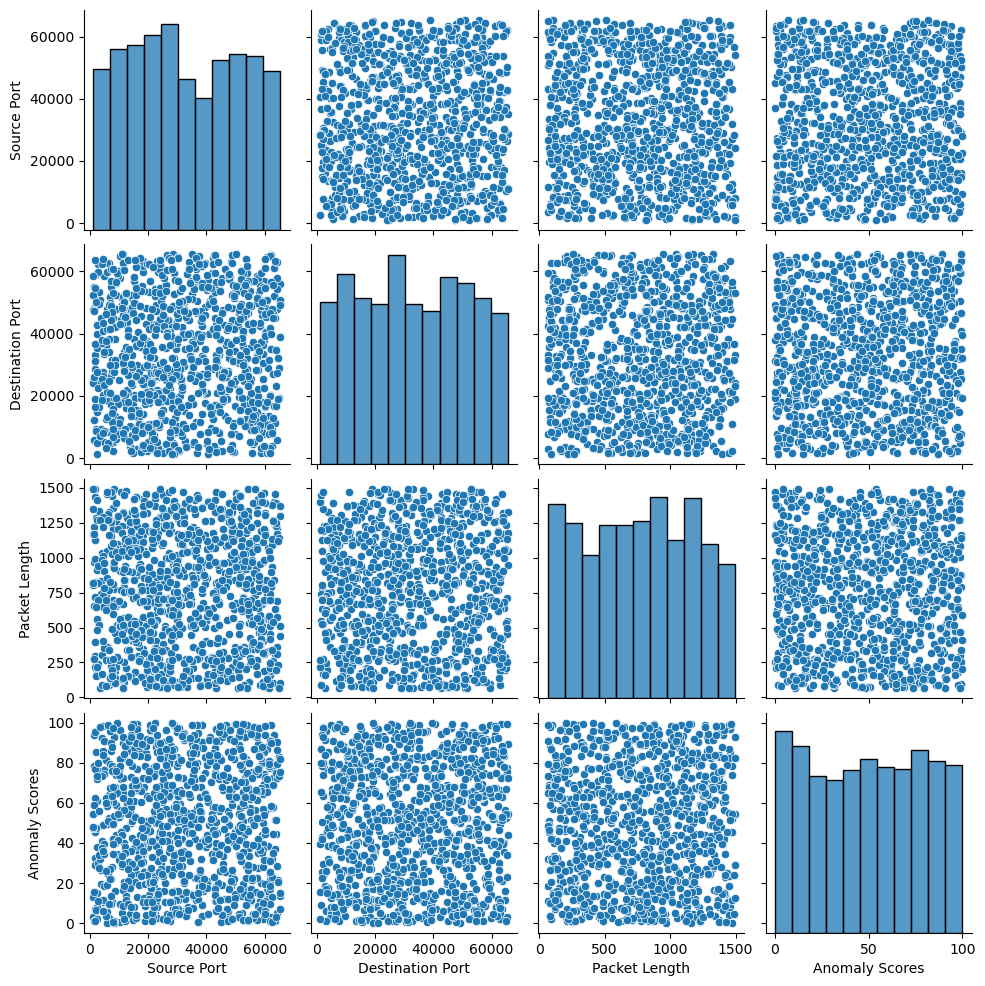

In [17]:
# random sample for pairplot
cyber_sample = cyber_df.sample(n=1000, random_state=42)
sns.pairplot(cyber_sample)

### Outlier detection

In [18]:
count_outliers_iqr(cyber_df)

{'Source Port': 0,
 'Destination Port': 0,
 'Packet Length': 0,
 'Anomaly Scores': 0}

### Line/Area plots

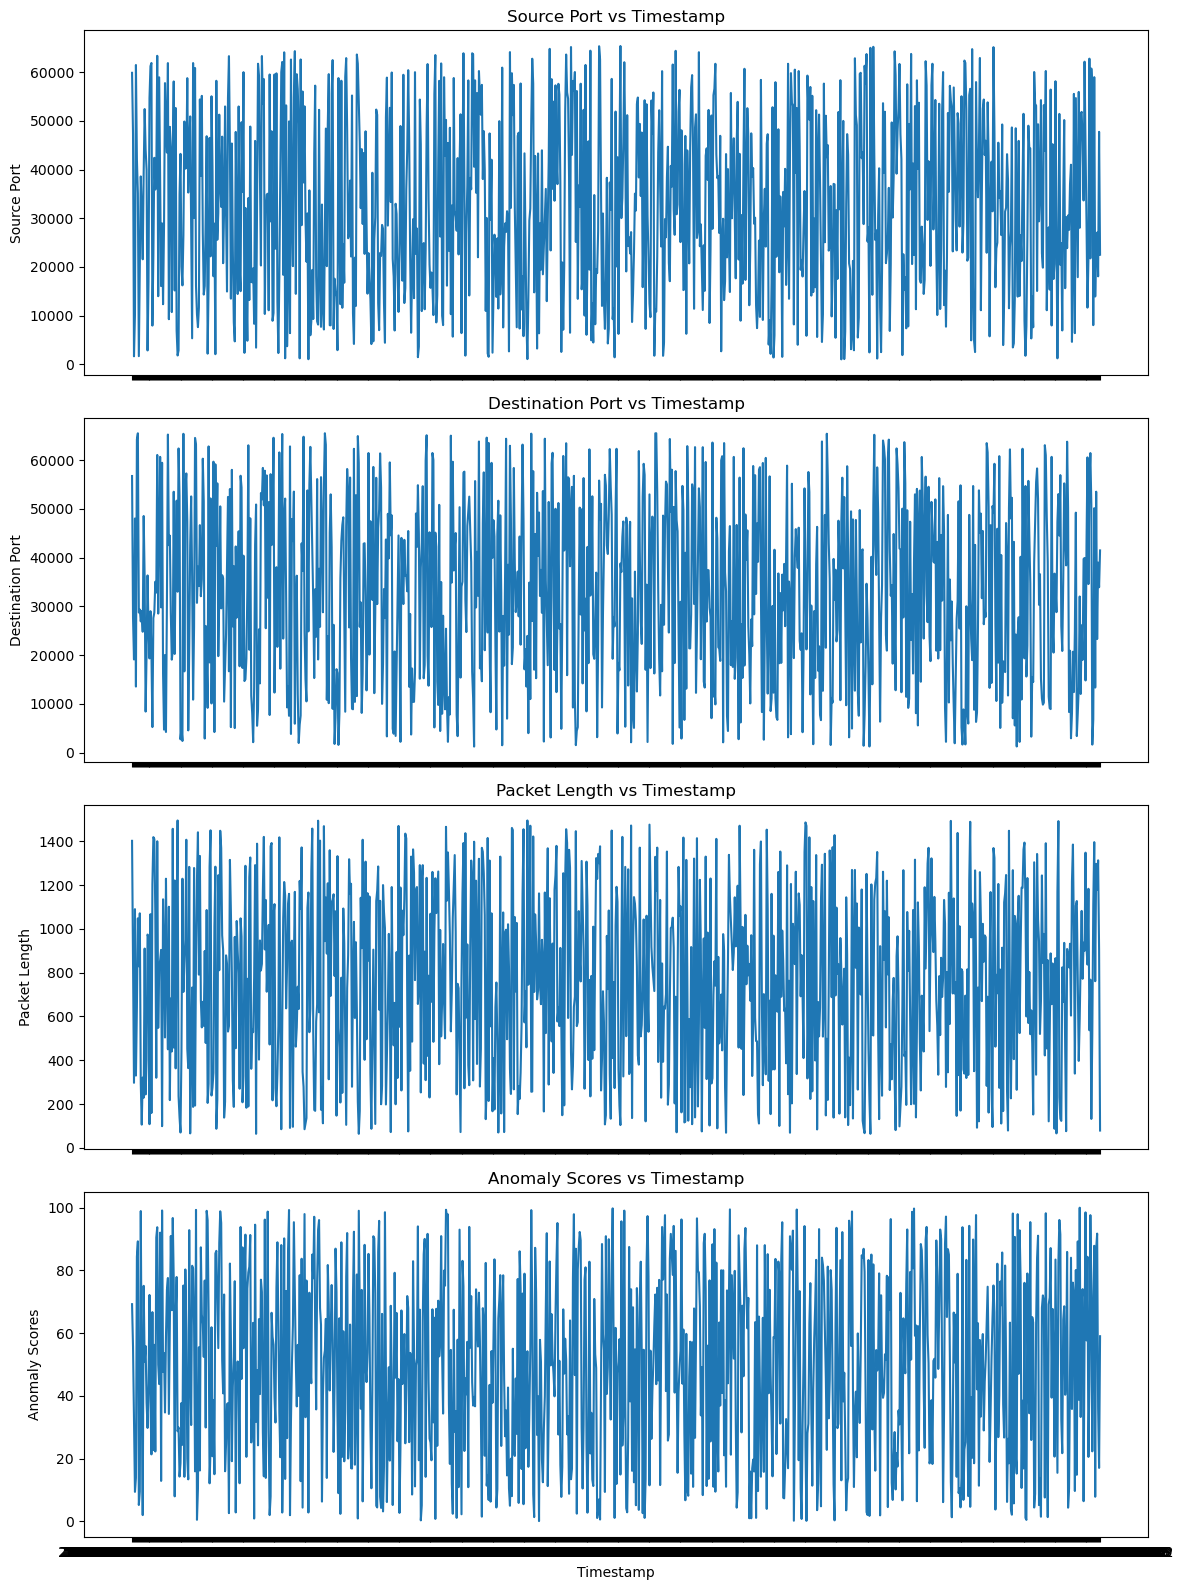

In [19]:
plot_numeric_columns_vs_timestamp(cyber_sample)

---

## UNSW dataset

In [20]:
UNSW_df.head()

dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087486   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473373   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373825   

          sload  ...  trans_depth  response_body_len  ct_src_dport_ltm  \
0  14158.942383  ...            0                  0                 1   
1   8395.112305  ...            0                  0                 1   
2   1572.271851  ...            0                  0                 1   
3   2740.178955  ...            0                  0                 1   
4   8561.499023  ...            0                  0                 2   

   ct_dst_sport_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0                 1             0           0                 0   
1                 1             0           0                 0   
2                 1             0           0                 0   
3                 1             1           1                 0   
4                 1             0           0                 0   

   is_sm_ips_ports  attack_cat  label  
0                0      Normal      0  
1                0      Normal      0  
2                0      Normal      0  
3                0      Normal      0  
4                0      Normal      0  

[5 rows x 36 columns]

### Correlation plot

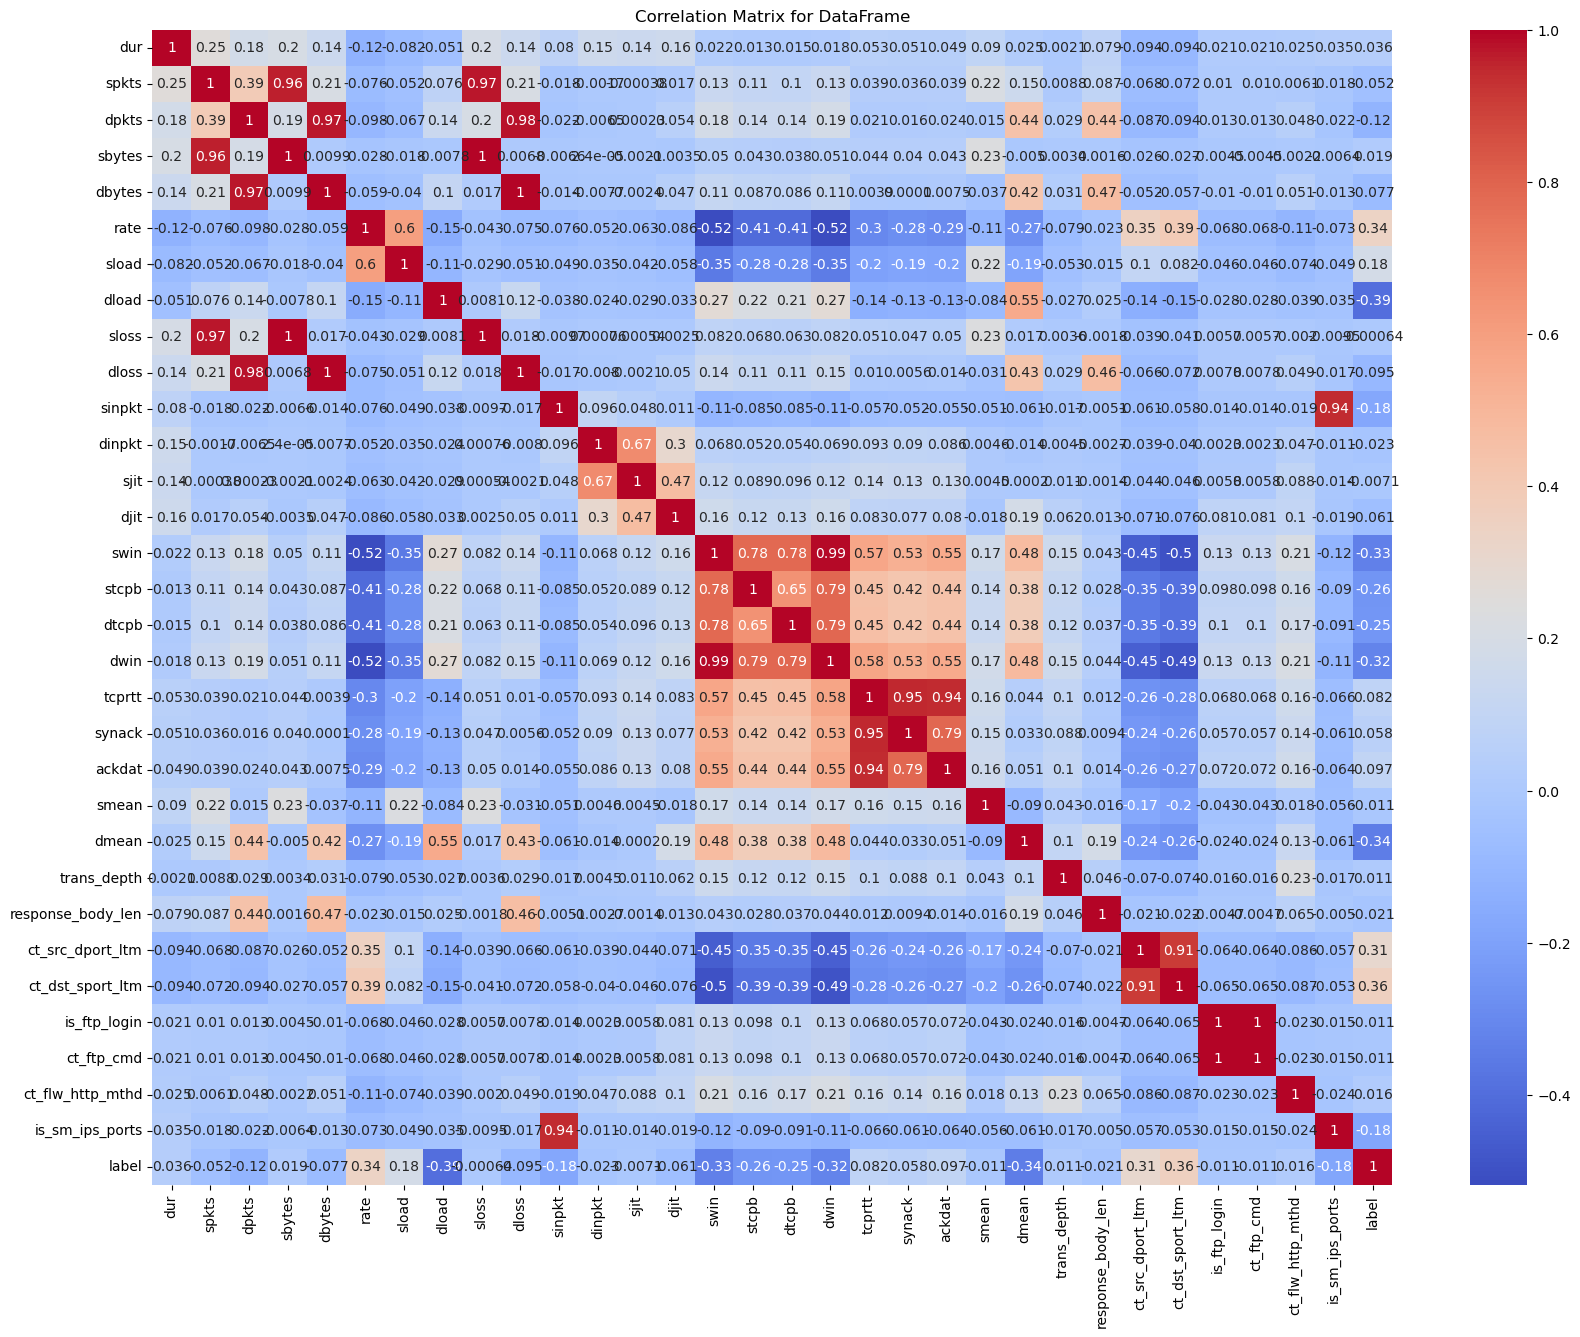

In [21]:
plot_heatmap(UNSW_df, figsize=(20,15))

### Scatterplots

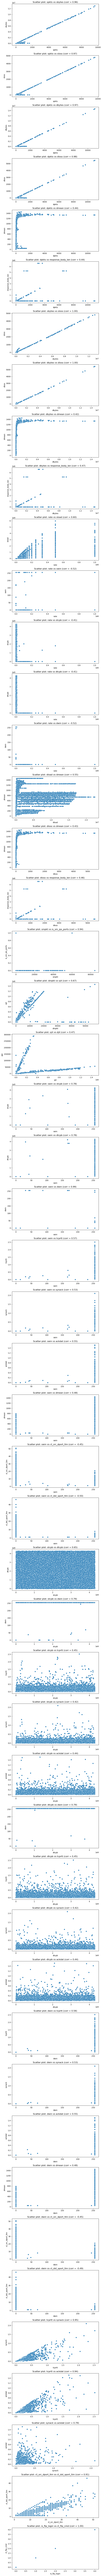

In [25]:
plot_scatter_high_corr_pairs(UNSW_df)

### Pairplot

Too many columns to neatly organize into a pairplot

### Outlier detection

In [23]:
count_outliers_iqr(UNSW_df)

{'dur': 15741,
 'spkts': 24675,
 'dpkts': 20830,
 'sbytes': 22873,
 'dbytes': 28131,
 'rate': 17340,
 'sload': 13518,
 'dload': 38143,
 'sloss': 11467,
 'dloss': 28388,
 'sinpkt': 14788,
 'dinpkt': 14096,
 'sjit': 18033,
 'djit': 20574,
 'swin': 0,
 'stcpb': 0,
 'dtcpb': 0,
 'dwin': 0,
 'tcprtt': 15878,
 'synack': 31462,
 'ackdat': 8290,
 'smean': 20725,
 'dmean': 23359,
 'trans_depth': 17840,
 'response_body_len': 11294,
 'ct_src_dport_ltm': 33423,
 'ct_dst_sport_ltm': 37337,
 'is_ftp_login': 2567,
 'ct_ftp_cmd': 2567,
 'ct_flw_http_mthd': 17840,
 'is_sm_ips_ports': 2762,
 'label': 0}

### Line/Area plots

No timestamp data

### Conclusions

+ Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

    + Heavy class imbalance is to be expected across all of the datasets. Attacks/anomalies should be rare after all! Must look into ways to account for this such as oversampling or undersampling. Using Ensemble methods like Boosting should prove to be useful.

    + After finding the correlation coefficients between features acorss all of the datasets, it became apparent that most of the features should not be assessed based on linearity. However, there were a few in the UNSW dataset which proved to have a near perfect direct relationship.


- Do you see any outliers?  (Data points that are far from the rest of the data).

    + I used the IQR rule to determine outliers. Given that this dataset is used for anomaly detection research, I believe that dropping the outliers here would be a mistake. I would need to look into outlier detection more robustly

+ Are any data items highly correlated with each other, suggesting that they are redundant?

+ For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

    - There are no clear patterns or trends over time for the BETH dataset or the cyber attacks dataset. The BETH dataset has something that appears to be noteworthy. It appears that the majority of suspicous activity occured in close proximity intervals. The intervals however apear random. 

    - the cyber attacks dataset appears to be completely random across all features in relation to time

+ Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

---

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

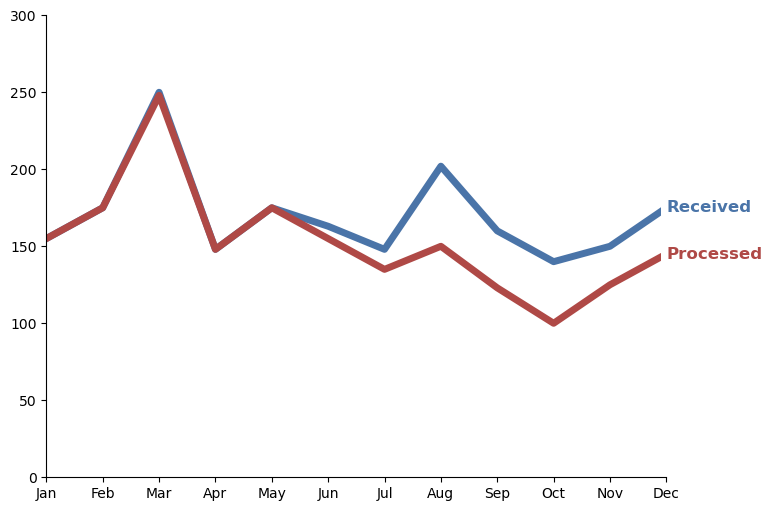

In [24]:
import matplotlib.pyplot as plt

chart_data = {
    "Received":{'Jan':155,'Feb':175, 'Mar':250, 'Apr':148, 'May':175, 'Jun': 163, 'Jul':148, 'Aug':202, 'Sep':160, 'Oct':140, 'Nov':150, 'Dec':175},
    "Processed":{'Jan':155,'Feb':175, 'Mar':248, 'Apr':148, 'May':175, 'Jun':155, 'Jul':135, 'Aug':150, 'Sep':123, 'Oct':100, 'Nov':125, 'Dec':145},
}

colors = {
    "Received": "#4a74a8",
    "Processed": "#af4946"
}

chart_data_df = pd.DataFrame(chart_data)

plt.figure(figsize=(8,6))

for column in chart_data_df.columns:
    plt.plot(chart_data_df.index, chart_data_df[column], linestyle='-', linewidth=5, label=column, color=colors[column])
    # Add text label at the end of each line
    last_x = chart_data_df.index[-1]  # Last month (Dec)
    last_y = chart_data_df[column].iloc[-1]  # Last value
    plt.text(last_x, last_y, column, fontsize=12, color=colors[column], verticalalignment='center', fontweight='bold', bbox=dict(facecolor='white', edgecolor='none'))


plt.margins(x=0)
plt.yticks(range(0, 301, 50))

plt.gca().spines[['top', 'right']].set_visible(False) # hides the lines surrounding the chart

plt.show()
plt.show()

### Figure 3.23 <i>Leverage consistent color </i>  on pg 97

Work on part 3